# Workforce Scheduler

### Authors

Sara Carolina Gomez Delgado

Luis Eduardo Robles Jimenez

In [1]:
from data import * 
from genetic_algorithm import genetic_algorithm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def graph(points, lbl = None):
    if lbl is None: plt.scatter(np.arange(len(points)), points)
    else:
        plt.scatter(np.arange(len(points)), points, label = lbl)
        plt.legend()

In [3]:
popSize = 50

descanso = np.where(breaks == "Descansa")[0]
manana = np.where(breaks == "Mañana")[0]
tarde = np.where(breaks == "Tarde")[0]
comida = np.where(breaks == "Comida")[0]

In [4]:
pop = [[comida, descanso, manana, comida, comida, comida, descanso] if p in domingos else [descanso, manana if np.random.random() <= 0.5 else tarde, comida, comida, comida, comida, comida] for p in people]
initial_population = [np.copy(pop) for i in range(popSize)]
initial_population = np.array(initial_population).reshape((popSize, len(people), 7))
initial_population.shape

(50, 18, 7)

In [5]:
r = genetic_algorithm(rules, (breaks, areas, inventario, people, domingos), popSize, 100, pRep = 0.5, pMut = 0.5, dim = (len(people), 7, 0, len(breaks)), init = initial_population, debug = False)
r

{'solution': array([[2, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 2, 0, 0],
        [0, 0, 2, 0, 1, 0, 0],
        [0, 0, 1, 2, 0, 0, 0],
        [3, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 3, 0, 0],
        [0, 1, 0, 3, 0, 0, 0],
        [0, 2, 1, 0, 0, 0, 1],
        [0, 2, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 2, 1, 0],
        [0, 0, 0, 0, 2, 1, 0],
        [1, 2, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 3, 1, 0],
        [0, 1, 0, 0, 2, 0, 0],
        [0, 1, 0, 2, 0, 0, 1],
        [1, 2, 0, 0, 0, 0, 0],
        [0, 0, 2, 0, 1, 0, 1],
        [2, 0, 0, 0, 1, 0, 0]], dtype=int64),
 'fitness': 15,
 'callsToFunction': 5050,
 'bestTracker': [-19,
  -19,
  -7,
  -7,
  -6,
  -6,
  -6,
  -6,
  -6,
  -6,
  -6,
  -6,
  -6,
  -6,
  -6,
  -6,
  -6,
  -6,
  -6,
  -6,
  -6,
  -5,
  -5,
  -4,
  -4,
  -4,
  -4,
  -3,
  -3,
  -3,
  -3,
  -3,
  -3,
  -3,
  -3,
  -3,
  -3,
  -3,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  6

In [6]:
a = rules(r['solution'], breaks, areas, inventario, people, domingos, True)
print("Fitness: {}".format(a[0]))
print("{} errors.".format(len(a[1])))
print(*a[1][:10], sep = '\n')

[[2 0 0 0 0 1 0]
 [0 1 0 0 2 0 0]
 [0 0 2 0 1 0 0]
 [0 0 1 2 0 0 0]
 [3 0 0 0 0 1 0]
 [1 0 0 0 3 0 0]
 [0 1 0 3 0 0 0]
 [0 2 1 0 0 0 1]
 [0 2 0 1 0 0 1]
 [0 0 0 0 2 1 0]
 [0 0 0 0 2 1 0]
 [1 2 0 0 0 0 0]
 [0 0 0 0 3 1 0]
 [0 1 0 0 2 0 0]
 [0 1 0 2 0 0 1]
 [1 2 0 0 0 0 0]
 [0 0 2 0 1 0 1]
 [2 0 0 0 1 0 0]]
Fitness: 15
0 errors.



In [7]:
print("Nombre", "LUN", "MAR", "MIER", "JUE", "VIE", "SAB", "DOM", sep = "\t")
for i, p in enumerate(r['solution']):
    print(people[i][:6], end = '\t')
    for j, d in enumerate(p):
        print(codigos[d], end = '\t')
    print(areas[i][0], end = '\t')
    if len(areas[i]) > 1: print(areas[i][1], end = "")
    print()

Nombre	LUN	MAR	MIER	JUE	VIE	SAB	DOM
Samant	M	C	C	C	C	D	C	Damas	Lenceria
Luz	C	D	C	C	M	C	C	Damas	Ninas
Laura	C	C	M	C	D	C	C	Damas	Moda joven
Maira	C	C	D	M	C	C	C	Damas	Dama madura
Gloria	T	C	C	C	C	D	C	Zapateria	Zapateria damas
Fernan	D	C	C	C	T	C	C	Zapateria	Zapato deportivo
Mariso	C	D	C	T	C	C	C	Caballeros	Bebes
Susy	C	M	D	C	C	C	D	Zapateria	Zapato caballero
Diana	C	M	C	D	C	C	D	Jugueteria	
Brayan	C	C	C	C	M	D	C	Perfumeria	
Nallel	C	C	C	C	M	D	C	Cajas ropa	
Marlet	D	M	C	C	C	C	C	Cajas ropa	
Lucia	C	C	C	C	T	D	C	Caballeros	
Fabian	C	D	C	C	M	C	C	Caballeros	
Albert	C	D	C	M	C	C	D	Zapateria	Zapato caballero
Elena	D	M	C	C	C	C	C	Paqueteria	
Nancy	C	C	M	C	D	C	D	Caballeros	Ninos
Andrea	M	C	C	C	D	C	C	Caballeros	Bebes


(pR = 0.25, pM = 0.25)	->	15.1
(pR = 0.25, pM = 0.5)	->	8.9
(pR = 0.25, pM = 0.75)	->	9.1
(pR = 0.5, pM = 0.25)	->	16.8
(pR = 0.5, pM = 0.5)	->	11.2
(pR = 0.5, pM = 0.75)	->	6.6
(pR = 0.75, pM = 0.25)	->	15.4
(pR = 0.75, pM = 0.5)	->	13.4
(pR = 0.75, pM = 0.75)	->	7.0


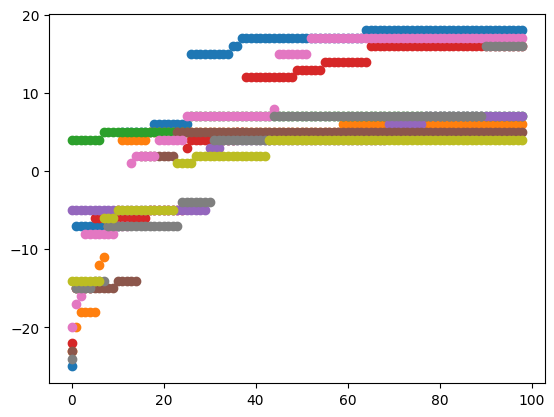

In [8]:
for pR in np.arange(0.25, 1, 0.25):
    for pM in np.arange(0.25, 1, 0.25):
        s, iter = 0, 10
        tracker, best = [], -1e10
        for i in range(iter):
            r = genetic_algorithm(rules, (breaks, areas, inventario, people, domingos), popSize, 100, pRep = pR, pMut = pM, dim = (len(people), 7, 0, len(breaks)), init = initial_population, debug = False)
            s += r['fitness']
            if not i or s > best:
                best = s
                tracker = r['bestTracker']
        graph(tracker)
        print("(pR = {}, pM = {})\t->\t{}".format(pR, pM, s/iter))